<a href="https://colab.research.google.com/github/Wonny0120/Seongwon-portpolio/blob/main/my_starter_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
custom_weights = {
    'no': 1,
    'yes': 10
}

In [ ]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             37069 non-null  object 
 2   marital         37069 non-null  object 
 3   education       37069 non-null  object 
 4   default         37069 non-null  object 
 5   housing         37069 non-null  object 
 6   loan            37069 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  campaign        37069 non-null  int64  
 11  pdays           37069 non-null  int64  
 12  previous        37069 non-null  int64  
 13  poutcome        37069 non-null  object 
 14  emp.var.rate    37069 non-null  float64
 15  cons.price.idx  37069 non-null  float64
 16  cons.conf.idx   37069 non-null  float64
 17  euribor3m       37069 non-null 

In [ ]:
yes = campaign.query("y == 'yes'")
no = campaign.query("y == 'no'")

In [ ]:
no.loan.value_counts()

,count
loan,
no,27092
yes,4972
unknown,797


In [ ]:
yes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4208 entries, 67 to 37067
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4208 non-null   int64  
 1   job             4208 non-null   object 
 2   marital         4208 non-null   object 
 3   education       4208 non-null   object 
 4   default         4208 non-null   object 
 5   housing         4208 non-null   object 
 6   loan            4208 non-null   object 
 7   contact         4208 non-null   object 
 8   month           4208 non-null   object 
 9   day_of_week     4208 non-null   object 
 10  campaign        4208 non-null   int64  
 11  pdays           4208 non-null   int64  
 12  previous        4208 non-null   int64  
 13  poutcome        4208 non-null   object 
 14  emp.var.rate    4208 non-null   float64
 15  cons.price.idx  4208 non-null   float64
 16  cons.conf.idx   4208 non-null   float64
 17  euribor3m       4208 non-null   floa

In [ ]:
no.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32861 entries, 0 to 37068
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32861 non-null  int64  
 1   job             32861 non-null  object 
 2   marital         32861 non-null  object 
 3   education       32861 non-null  object 
 4   default         32861 non-null  object 
 5   housing         32861 non-null  object 
 6   loan            32861 non-null  object 
 7   contact         32861 non-null  object 
 8   month           32861 non-null  object 
 9   day_of_week     32861 non-null  object 
 10  campaign        32861 non-null  int64  
 11  pdays           32861 non-null  int64  
 12  previous        32861 non-null  int64  
 13  poutcome        32861 non-null  object 
 14  emp.var.rate    32861 non-null  float64
 15  cons.price.idx  32861 non-null  float64
 16  cons.conf.idx   32861 non-null  float64
 17  euribor3m       32861 non-null  floa

In [ ]:
4208/(4208 + 32861)


0.11351803393671261

In [ ]:
df = pd.get_dummies(campaign, columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"])

In [ ]:
yes2 = df.query("y == 'yes'")
no2 = df.query("y == 'no'")

In [ ]:
yes2['month_mar'].mean()

np.float64(0.05988593155893536)

In [ ]:
no2['month_mar'].mean()

np.float64(0.0074252153008125136)

In [ ]:
from sklearn.ensemble import VotingClassifier
vot = VotingClassifier

Those who are married are more likely to say no, while those who are single are more likely to say yes

Those who are retired, or are students are more likely to say yes, those who work in services are more likely to say no

Those with a basic 9 year education are more likely to say no, while those with a university degree were more likely to say yes

Those with no default are more likely to say yes (.13 difference), 90% of all yes have never defaulted vs 77% of all no. Default unkown is more likely to say no (22% vs ~9.5%)


Contacted by cellular more likely to say yes by over 20%, opposite for telephone

In [ ]:
'''y                       1.000000
poutcome_success        0.318755
previous                0.232235
contact_cellular        0.145960
month_mar               0.144841
                          ...
poutcome_nonexistent   -0.194899
emp.var.rate           -0.300816
euribor3m              -0.311169
pdays                  -0.328805
nr.employed            -0.358848
'''

'y                       1.000000\npoutcome_success        0.318755\nprevious                0.232235\ncontact_cellular        0.145960\nmonth_mar               0.144841\n                          ...   \npoutcome_nonexistent   -0.194899\nemp.var.rate           -0.300816\neuribor3m              -0.311169\npdays                  -0.328805\nnr.employed            -0.358848\n'

In [ ]:
x = df[['poutcome_success',  'previous', 'contact_cellular', 'month_mar', 'emp.var.rate', 'euribor3m', 'pdays', 'nr.employed']]
y = df['y']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .16, random_state = 17)

In [ ]:
x_train.head()

,poutcome_success,previous,contact_cellular,month_mar,emp.var.rate,euribor3m,pdays,nr.employed
23573,False,0,True,False,-0.1,4.120,999,5195.8
20365,False,0,True,False,1.4,4.964,999,5228.1
2650,False,0,False,False,1.1,4.859,999,5191.0
16877,False,0,True,False,1.4,4.968,999,5228.1
17737,False,0,True,False,1.4,4.968,999,5228.1


In [ ]:
y_train.head()

,y
23573,no
20365,no
2650,no
16877,no
17737,no


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(class_weight = 'balanced')

In [ ]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.94      0.88      0.91      5264
         yes       0.37      0.57      0.45       668

    accuracy                           0.84      5932
   macro avg       0.66      0.73      0.68      5932
weighted avg       0.88      0.84      0.86      5932



In [ ]:
test = confusion_matrix(y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

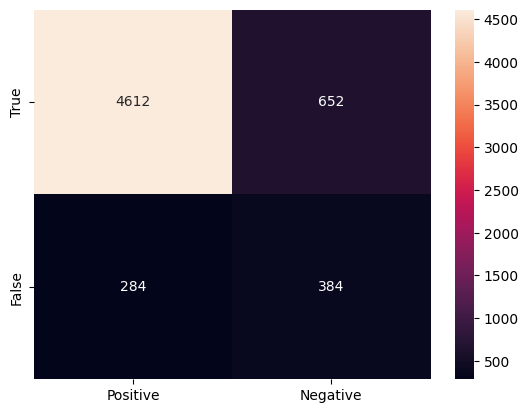

In [ ]:
sns.heatmap(test,annot = True, fmt = 'd', xticklabels = ['Positive', 'Negative'], yticklabels = ['True', 'False'])


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:

forest = RandomForestClassifier(class_weight = 'balanced', random_state=42, n_jobs =-1, min_samples_leaf =15)
forest.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=15, n_jobs=-1,
                       random_state=42)

In [ ]:
y_pred = forest.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))
t2 = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

          no       0.95      0.86      0.90      5264
         yes       0.38      0.66      0.48       668

    accuracy                           0.84      5932
   macro avg       0.66      0.76      0.69      5932
weighted avg       0.89      0.84      0.86      5932



In [ ]:
(.66*2+.38)/3

0.5666666666666668

<Axes: >

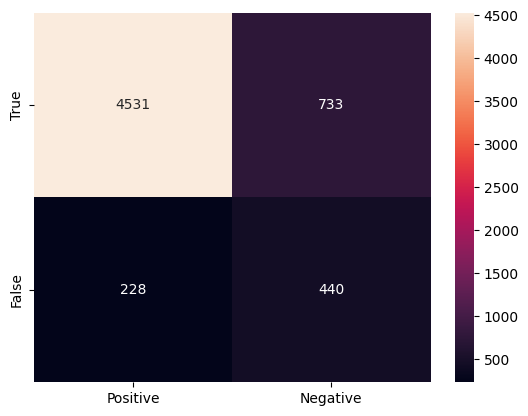

In [ ]:
sns.heatmap(t2,annot = True, fmt = 'd', xticklabels = ['Positive', 'Negative'], yticklabels = ['True', 'False'])

In [ ]:
df.y.replace('no', 0, inplace = True)
df.y.replace('yes', 1, inplace = True)
cor_matrix = df.corr()['y'].sort_values(ascending = False)
print(cor_matrix)

/tmp/ipython-input-2563568320.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.y.replace('yes', 1, inplace = True)


y                       1.000000
poutcome_success        0.318755
previous                0.232235
contact_cellular        0.145960
month_mar               0.144841
                          ...   
poutcome_nonexistent   -0.194899
emp.var.rate           -0.300816
euribor3m              -0.311169
pdays                  -0.328805
nr.employed            -0.358848
Name: y, Length: 63, dtype: float64


/tmp/ipython-input-3349479580.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette=colors)


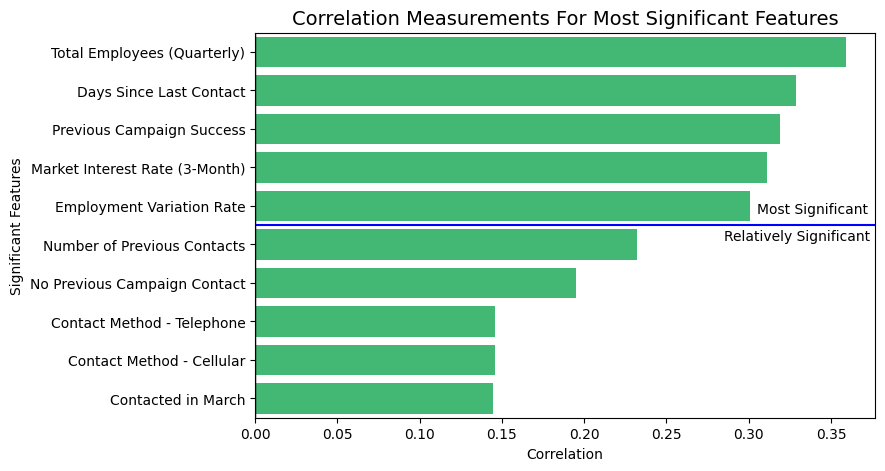

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
rename_map = {
    'emp.var.rate': 'Employment Variation Rate',
    'nr.employed': 'Total Employees (Quarterly)',
    'euribor3m': 'Market Interest Rate (3-Month)',
    'cons.conf.idx': 'Consumer Confidence Index',
    'cons.price.idx': 'Consumer Price Index',
    'poutcome': 'Previous Campaign Outcome',
    'pdays': 'Days Since Last Contact',
    'poutcome_success': 'Previous Campaign Success',
    'poutcome_nonexistent': 'No Previous Campaign Contact',
    'previous': 'Number of Previous Contacts',
    'contact_telephone': 'Contact Method - Telephone',
    'month_mar': 'Contacted in March',
    'month_oct': 'Contacted in October',
    'contact_cellular': 'Contact Method - Cellular'
}
renamed = df.rename(columns=rename_map)
correlations = renamed.corr(numeric_only=True)['y'].drop('y').abs()

# Apply the double filter (Greater than .15 OR Less than -.14)
top_features = correlations[(correlations > 0.144) | (correlations < -0.14)].sort_values(ascending=False)

plt.figure(figsize=(8, 5))
# Using a diverging color palette to show positive vs negative impact
colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in top_features]

sns.barplot(x=top_features.values, y=top_features.index, palette=colors)
plt.title('Correlation Measurements For Most Significant Features', fontsize=14)
plt.axvline(x=0, color='black', lw=1)
plt.xlabel('Correlation')
plt.ylabel('Significant Features')
plt.axhline(y=4.5, color='blue', label='Industry Average')
plt.text(x=.305, y = 4.2, s = "Most Significant")
plt.text(x=.285, y = 4.9, s = "Relatively Significant")
plt.show()

In [ ]:
x = df[['euribor3m',  'age', 'nr.employed', 'emp.var.rate', 'campaign', 'cons.conf.idx', 'pdays', 'housing_yes', "contact_telephone", "default_unknown", "poutcome_success", "marital_married", "loan_yes", "day_of_week_mon"]]
y = df['y']

In [ ]:
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x,y,test_size = .16, random_state = 17)

In [ ]:
forest2 = RandomForestClassifier(class_weight = 'balanced', random_state = 17, min_samples_leaf = 2, n_jobs=-1)
forest2.fit(x_train2, y_train2)
y_pred = forest2.predict(x_test2)
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      5264
           1       0.43      0.52      0.47       668

    accuracy                           0.87      5932
   macro avg       0.68      0.72      0.70      5932
weighted avg       0.88      0.87      0.87      5932



<Axes: xlabel='features', ylabel='importances'>

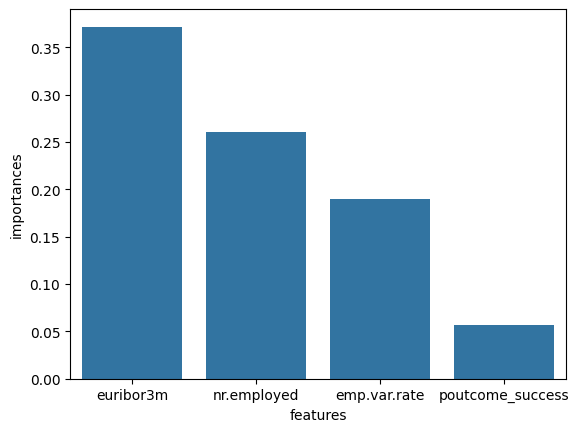

In [ ]:
featured_importance = (
  pd.DataFrame({'importances': forest.feature_importances_, 'features': x_train.columns})
).query('importances > 0.05').sort_values('importances', ascending=False).reset_index()
sns.barplot(featured_importance, x='features', y = 'importances')

In [ ]:
test = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv")

# Do same transformations as on the training set
dum_test = pd.get_dummies(test, columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"])
dum_test_align = dum_test.reindex(columns = x_train.columns, fill_value = 0)
predictions = forest.predict(dum_test_align)

# Convert the predictions to a dataframe and label the column 'y'
my_predictions = pd.DataFrame(predictions, columns = ['y'])
my_predictions.y.replace('no', 0, inplace = True)
my_predictions.y.replace('yes', 1, inplace = True)

# Replace PUTTEAMNUMBERHERE with your team
my_predictions.to_csv("team6-module2-predictions.csv",index=False)

/tmp/ipython-input-514214531.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  my_predictions.y.replace('no', 0, inplace = True)
/tmp/ipython-input-514214531.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
my_predictions.info()
no.campaign.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       410 non-null    int64
dtypes: int64(1)
memory usage: 3.3 KB


,campaign
count,32861.000000
mean,2.629835
std,2.869389
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,56.000000


In [ ]:
yes.campaign.describe()

,campaign
count,4208.000000
mean,2.053470
std,1.647362
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,17.000000


In [ ]:
4208/(4208 + 32861)

0.11351803393671261

In [ ]:
.11351803393671261 * 410


46.54239391405217

In [ ]:
holdout = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv")
final_test = pd.get_dummies(holdout, columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"])
final_test_align = final_test.reindex(columns = x_train.columns, fill_value = 0)
predictions = forest.predict(final_test_align)

# Convert the predictions to a dataframe and label the column 'y'
final_predictions = pd.DataFrame(predictions, columns = ['y'])
final_predictions.y.replace('no', 0, inplace = True)
final_predictions.y.replace('yes', 1, inplace = True)

# Replace PUTTEAMNUMBERHERE with your team
final_predictions.to_csv("team6-module2-predictions.csv",index=False)

/tmp/ipython-input-3855812504.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_predictions.y.replace('no', 0, inplace = True)
/tmp/ipython-input-3855812504.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
final_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       4119 non-null   int64
dtypes: int64(1)
memory usage: 32.3 KB


In [ ]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  campaign        4119 non-null   int64  
 11  pdays           4119 non-null   int64  
 12  previous        4119 non-null   int64  
 13  poutcome        4119 non-null   object 
 14  emp.var.rate    4119 non-null   float64
 15  cons.price.idx  4119 non-null   float64
 16  cons.conf.idx   4119 non-null   float64
 17  euribor3m       4119 non-null   f

In [ ]:
month_order = ['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
renamed_months = {
    'mar': 'March',
    'apr': 'April',
    'may': 'May',
    'jun': 'June',
    'jul': 'July',
    'aug': 'August',
    'sep': 'September',
    'oct': 'October',
    'nov': 'November',
    'dec': 'December'
}
renamed = campaign.replace(renamed_months)

In [ ]:
renamed.y.replace('no', 0, inplace = True)
renamed.y.replace('yes', 1, inplace = True)
monthly_conversion = renamed.groupby('month')['y'].mean().sort_values(ascending=False)

# 2. Convert to percentage format for the report
monthly_conversion_pct = monthly_conversion * 100

print(monthly_conversion_pct)

month
March        50.806452
December     49.367089
September    46.456693
October      44.563553
April        20.937104
August       10.495050
June         10.421424
November     10.302866
July          9.138867
May           6.467259
Name: y, dtype: float64


/tmp/ipython-input-3159437905.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  renamed.y.replace('no', 0, inplace = True)
/tmp/ipython-input-3159437905.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

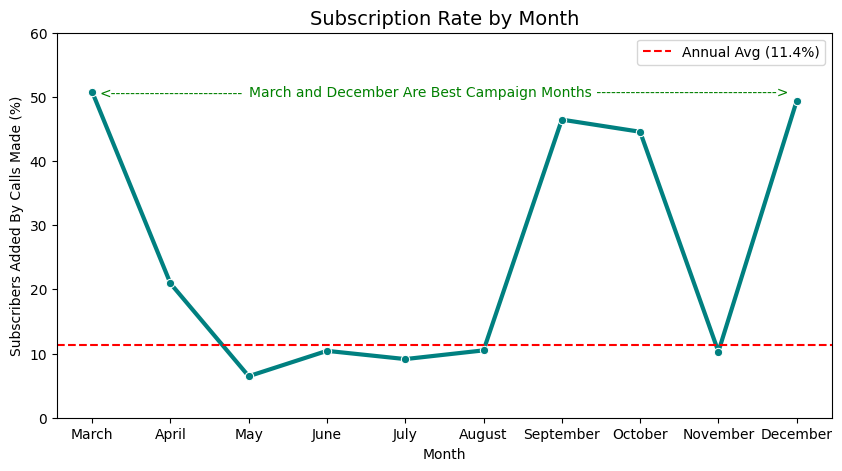

In [ ]:
# Reorder the data
monthly_conversion_pct = monthly_conversion_pct.reindex(month_order)

# Plotting the Seasonality
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x=monthly_conversion_pct.index, y=monthly_conversion_pct.values, marker='o', color='teal', linewidth=3)


avg_rate = df['y'].mean() * 100
plt.axhline(avg_rate, color='red', linestyle='--', label=f'Annual Avg ({avg_rate:.1f}%)')
plt.text(x=2,y= 50, color='green', s='March and December Are Best Campaign Months')
plt.text(x=0.1,y= 50, color='green', s='<---------------------------')
plt.text(x=6.39,y= 50, color='green', s=' ------------------------------------->')
plt.title('Subscription Rate by Month', fontsize=14)
plt.ylabel('Subscribers Added By Calls Made (%)')
plt.xlabel('Month')
plt.ylim(0, 60)
plt.legend()
plt.show()

In [ ]:
renamed.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,May,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,May,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,May,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,May,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,May,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
